## This notebook runs a visualization of the real image denoising results shown in the paper.
#### The first cell shows the denoising results of Tables 2 and 4 (grayscale BSD68 and color CBSD68)
#### The second cell shows the denoising results of Table 3 (varying noise levels)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

# Denoising results, BSD68/CBSD68:

Grayscale test images are those of BSD68, color test images are those of CBSD68.
The evaluation is carried out over the test noise levels:
 [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75] 

gray DnCNN PSNR results, with training up to 55:
[37.65 33.62 31.34 29.7  28.4  27.28 26.31 25.47 24.69 24.01 23.34 22.6
 21.45 19.78 18.16]
gray BUIFD PSNR results, with training up to 55:
[37.41 33.55 31.4  29.9  28.76 27.8  26.99 26.26 25.62 25.01 24.44 23.82
 23.08 22.12 20.96]
**** Mean DnCNN: 26.25 dB ****
**** Mean BUIFD: 27.14 dB ****


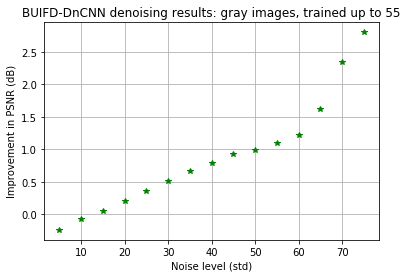

gray DnCNN PSNR results, with training up to 75:
[37.64 33.62 31.38 29.79 28.54 27.52 26.64 25.86 25.13 24.47 23.89 23.35
 22.86 22.42 21.98]
gray BUIFD PSNR results, with training up to 75:
[37.24 33.47 31.34 29.87 28.74 27.81 27.02 26.32 25.68 25.09 24.55 24.03
 23.55 23.1  22.67]
**** Mean DnCNN: 27.01 dB ****
**** Mean BUIFD: 27.37 dB ****


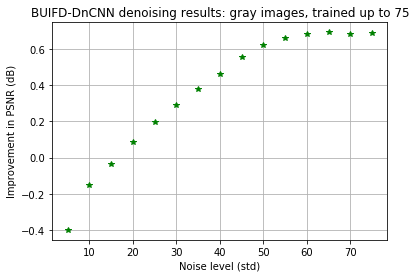

color DnCNN PSNR results, with training up to 55:
[40.05 35.92 33.57 31.93 30.66 29.61 28.72 27.91 27.17 26.48 25.85 25.24
 24.65 24.08 23.52]
color BUIFD PSNR results, with training up to 55:
[40.07 36.01 33.66 32.03 30.75 29.71 28.8  28.01 27.27 26.59 25.95 25.34
 24.74 24.18 23.62]
**** Mean DnCNN: 29.02 dB ****
**** Mean BUIFD: 29.12 dB ****


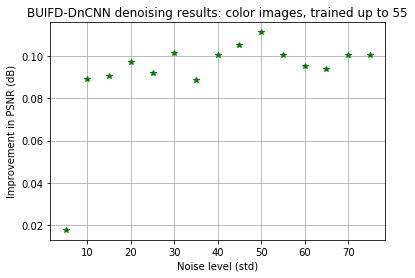

color DnCNN PSNR results, with training up to 75:
[39.75 35.74 33.46 31.85 30.61 29.58 28.7  27.92 27.2  26.52 25.89 25.27
 24.69 24.13 23.58]
color BUIFD PSNR results, with training up to 75:
[40.04 35.98 33.65 32.02 30.76 29.71 28.81 28.02 27.28 26.6  25.96 25.35
 24.75 24.19 23.63]
**** Mean DnCNN: 28.99 dB ****
**** Mean BUIFD: 29.12 dB ****


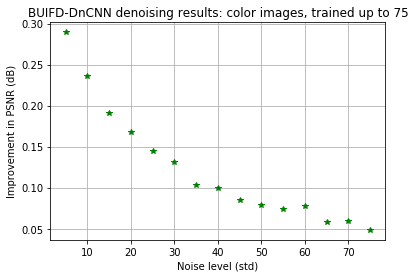

In [2]:
def get_PSNR(color_mode, model, max_train_noise, varying_noise=False):
    epoch = 49
    model_name = color_mode + ('_BUIFD_' if model == 'F' else '_DnCNN_') + str(max_train_noise)
    PSNR = np.load( os.path.join('Logs', model_name, ('varN_' if varying_noise else '')  + 'PSNR_' + str(epoch) + '.npy' ) )
    return PSNR



std_values = list(range(5,76,5))
print('Grayscale test images are those of BSD68, color test images are those of CBSD68.')
print('The evaluation is carried out over the test noise levels:\n', std_values, '\n')

for _, color in enumerate(['gray', 'color']):

    for _, max_train_noise in enumerate([55,75]):

        print(color, 'DnCNN PSNR results, with training up to %d:' %max_train_noise)
        PSNR_R = get_PSNR(color, 'R', max_train_noise)
        print(np.round(np.mean(PSNR_R,0),2))

        print(color, 'BUIFD PSNR results, with training up to %d:' %max_train_noise)
        PSNR_F = get_PSNR(color, 'F', max_train_noise)
        print(np.round(np.mean(PSNR_F,0),2))
        
        print('**** Mean DnCNN: %.2f dB ****' %np.mean(PSNR_R))
        print('**** Mean BUIFD: %.2f dB ****' %np.mean(PSNR_F))
        
        
        plt.plot(std_values, np.mean(PSNR_F,0) - np.mean(PSNR_R,0), 'g*')
        plt.ylabel('Improvement in PSNR (dB)')
        plt.xlabel('Noise level (std)')
        plt.title('BUIFD-DnCNN denoising results: ' + color + ' images, trained up to %d' %max_train_noise)
        plt.grid()
        plt.show()
        



# Denoising with varying noise:

The evaluation is now carried out over intervals of varying test noise levels, each of range 20 and centered at:
 [15, 25, 40, 55, 65]
For instance, with a central noise level 25, the added noise increases linearly across the image from level 15 to level 35.

gray DnCNN PSNR results, with training up to 55:
[31.25 28.31 25.41 23.15 20.87]
gray BUIFD PSNR results, with training up to 55:
[31.38 28.74 26.23 24.32 22.8 ]
**** Mean DnCNN: 25.80 dB ****
**** Mean BUIFD: 26.70 dB ****


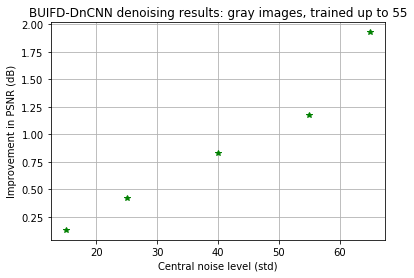

gray DnCNN PSNR results, with training up to 75:
[31.3  28.52 25.79 23.86 22.85]
gray BUIFD PSNR results, with training up to 75:
[31.34 28.73 26.28 24.53 23.53]
**** Mean DnCNN: 26.46 dB ****
**** Mean BUIFD: 26.88 dB ****


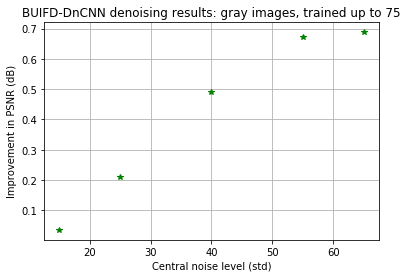

In [10]:
def get_PSNR(color_mode, model, max_noise_level, varying_noise=False):
    epoch = 49
    model_name = color_mode + ('_BUIFD_' if model == 'F' else '_DnCNN_') + str(max_train_noise)
    PSNR = np.load( os.path.join('Logs', model_name, ('varN_' if varying_noise else '')  + 'PSNR_' + str(epoch) + '.npy' ) )
    return PSNR



std_values = [15,25,40,55,65]
index_list = [2,4,7,10,12]
color = 'gray'
print('The evaluation is now carried out over intervals of varying test noise levels, each of range 20 and centered at:\n', std_values)
print('For instance, with a central noise level 25, the added noise increases linearly across the image from level 15 to level 35.\n')

for _, max_train_noise in enumerate([55,75]):

    print(color, 'DnCNN PSNR results, with training up to %d:' %max_train_noise)
    PSNR_R = get_PSNR(color, 'R', max_train_noise, True)
    print(np.round(np.mean(PSNR_R[:, index_list],0),2))

    print(color, 'BUIFD PSNR results, with training up to %d:' %max_train_noise)
    PSNR_F = get_PSNR(color, 'F', max_train_noise, True)
    print(np.round(np.mean(PSNR_F[:, index_list],0),2))

    print('**** Mean DnCNN: %.2f dB ****' %np.mean(PSNR_R[:, index_list]))
    print('**** Mean BUIFD: %.2f dB ****' %np.mean(PSNR_F[:, index_list]))


    plt.plot(std_values, np.mean(PSNR_F[:, index_list],0) - np.mean(PSNR_R[:, index_list],0), 'g*')
    plt.ylabel('Improvement in PSNR (dB)')
    plt.xlabel('Central noise level (std)')
    plt.title('BUIFD-DnCNN denoising results: ' + color + ' images, trained up to %d' %max_train_noise)
    plt.grid()
    plt.show()
        

